# *The Data Wrangling Workshop*: Activity 5.01, page 281

In [1]:
# import libraries
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# read the downloaded html file
fd = open("Data/List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding = "utf-8")
# initializing the soup variable passing the file to the BeautifulSoup function
soup = BeautifulSoup(fd)
# closing the file
fd.close()

In [3]:
# creating an all_tables variable by using the .find_all function
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [4]:
# using the .find() function to find the tables with a class of "wikitable"
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [47]:
# reviewing the contents of the variable 'data_table'
data_table

<table class='"wikitable"|}' style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List

In [5]:
# finding 'tr' tags in the data_table variable at the zero index
sources = data_table.tbody.findAll('tr', recursive=False)[0]
# using list comprehension to iterate over the sources variable finding 'td' tags
sources_list = [td for td in sources.findAll('td')]
# printing the length of the list
print(len(sources_list))

3


In [6]:
# creating a 'data' variable from the data_table by using the .finaAll function to find 'tr' and 'td tags'
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [7]:
# creating an empty list
data_tables = []
# using a for loop to append the tables to the empty list
for td in data:
    data_tables.append(td.findAll('table'))

In [8]:
# printing the length of the list (how many tables)
len(data_tables)

3

In [9]:
# creating a list called source_names using list comprehension
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [10]:
# creating a header 1 variable 
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [11]:
# creating rows1 variable which is getting each country from the html 
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')

In [48]:
# reviewing rows1 variable
rows1

[<tr style="font-weight:bold;background:#eaecf0">
 <td data-sort-value="-1"> </td>
 <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
 <td align="right">79,865,481
 </td></tr>,
 <tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </s

In [12]:
# creating data_rows1 variabe using list comprehension
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [49]:
# reviewing data_rows1
data_rows1

[['', 'World[19]', '79,865,481'],
 ['1', 'United States', '19,390,600'],
 ['2', 'China[n 1]', '12,014,610'],
 ['3', 'Japan', '4,872,135'],
 ['4', 'Germany', '3,684,816'],
 ['5', 'United Kingdom', '2,624,529'],
 ['6', 'India', '2,611,012'],
 ['7', 'France', '2,583,560'],
 ['8', 'Brazil', '2,054,969'],
 ['9', 'Italy', '1,937,894'],
 ['10', 'Canada', '1,652,412'],
 ['11', 'South Korea', '1,538,030'],
 ['12', 'Russia[n 2]', '1,527,469'],
 ['13', 'Australia', '1,379,548'],
 ['14', 'Spain', '1,313,951'],
 ['15', 'Mexico', '1,149,236'],
 ['16', 'Indonesia', '1,015,411'],
 ['17', 'Turkey', '849,480'],
 ['18', 'Netherlands', '825,745'],
 ['19', 'Saudi Arabia', '683,827'],
 ['20', 'Switzerland', '678,575'],
 ['21', 'Argentina', '637,717'],
 ['22', 'Taiwan', '579,302'],
 ['23', 'Sweden', '538,575'],
 ['24', 'Poland', '524,886'],
 ['25', 'Belgium', '494,733'],
 ['26', 'Thailand', '455,378'],
 ['27', 'Iran', '431,920'],
 ['28', 'Austria', '416,845'],
 ['29', 'Norway', '396,457'],
 ['30', 'United Ar

In [13]:
# combining variables into a dataframe
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,,World[19],"79,865,481"
1,1,United States,"19,390,600"
2,2,China[n 1],"12,014,610"
3,3,Japan,"4,872,135"
4,4,Germany,"3,684,816"


In [14]:
# getting headers from the html file using getText() and .strip() functions using list comprehension
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [15]:
# create rows2 variable, finding all tr tags
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')

In [16]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()


In [17]:
# creating a list with list comprehension
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [18]:
# combining the variables into a dataframe
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,,World,"80,683,787"
1,1,United States,"19,390,604"
2,,European Union[23],"17,277,698"
3,2,China[n 4],"12,237,700"
4,3,Japan,"4,872,137"


In [19]:
# getting headers
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [20]:
# create rows3 variable, finding all tr tags
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')

In [21]:
# creating a list with list comprehension
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [22]:
# combining the variables into a new dataframe
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,,World,"80,683,787"
1,1,United States,"19,390,604"
2,,European Union[23],"17,277,698"
3,2,China[n 4],"12,237,700"
4,3,Japan,"4,872,137"


# *The Data Wrangling Workshop*: Activity 6.01, page 309

In [23]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# loading csv file
df = pd.read_csv("Data/visit_data.csv")

In [25]:
# reviewing firstfive rows of dataframe 
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [26]:
# running the .duplicated() function that returns True or False 
print(f"First name is duplicated - {any(df.first_name.duplicated())}")
print(f"Last name is duplicated - {any(df.last_name.duplicated())}")
print(f"Email is duplicated - {any(df.email.duplicated())}")

First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


In [27]:
# checking the columns for null or NaN values using the column name with the .isnull() and .values.any() functions
# printing with an f-string 
print(f"The column Email contains NaN - {df.email.isnull().values.any()}") 
print(f"The column IP Address contains NaN - {df.ip_address.isnull().values.any()}") 
print(f"The column Visit contains NaN - {df.visit.isnull().values.any()}") 

The column Email contains NaN - False
The column IP Address contains NaN - False
The column Visit contains NaN - True


In [28]:
# saving the original datframe size to a variable
size_prev = df.shape
# saving a new dataframe after removing the NaN or null values from the 'visit' column
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
# saving the shape of the new dataframe to a variable 
size_after = df.shape

In [29]:
# f-strings work best for everything in my opinion
print(f"The size of previous data was - {size_prev[0]} rows and the size of the new one is - {size_after[0]} rows.")

The size of previous data was - 1000 rows and the size of the new one is - 974 rows.


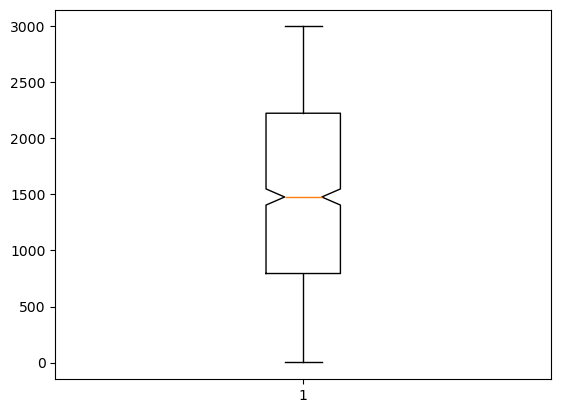

In [30]:
# creating a boxplot of the visit column
plt.boxplot(df.visit, notch=True)
plt.show()

In [31]:
# saving a new dataframe based on conditional statements
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # df1 contains values of visits less than or equal to 2900 and visits greater or equal to 100
# Here we abuse the fact the number of variable can be greater than the num-ber of replacement targets
print(f"After getting rid of outliers the new size of the data is - {df1.shape[0]}")

After getting rid of outliers the new size of the data is - 923


# Insert Data Into a SQL Lite Database

Create a table with the following data below that you will create yourself:
- Name, Address, City, State, Zip, Phone Number
- Add at least 10 rows of data and submit your code with a query generating your results.

In [32]:
# import libraries
import sqlite3

In [33]:
# creating a query variable 
query = """
CREATE TABLE test
(Name VARCHAR(20), Address VARCHAR(20), City VARCHAR(20), State VARCHAR(15), Zip INTEGER(9), Phone INTEGER(12));
"""

In [34]:
# creating a 'connection variable' to connect to the sqlite database
con = sqlite3.connect("mydata.sqlite")

In [37]:
# using the .execute function with the query as the parameter
con.execute(query)

In [38]:
# using .commit(), which executes the transaction to the database
con.commit()

In [39]:
# creating a data to be stored in the data variable to add to the database
data = [("Billy Fisher", "113 Candy Lane Dr", "Tampa", "Florida", 33519, 8135679999),
("Bob Fisher", "114 Candy Cane Dr", "Tampa", "Florida", 33519, 8135678888),
("Brenda Blacksmith", "1119 Iron Ore Rd", "Riverview", "Florida", 33579, 8135130000),
("Bobby Blacksmith", "1119 Iron Ore Rd", "Riverview", "Florida", 33579, 8135130001),
("Fred Flinstone", "100 Stone Age Ln", "Bedrock", "Utah", 44519, 6708974567),
("Wilma Flinstone", "100 Stone Age Ln", "Bedrock", "Utah", 44519, 6708974568),
("Barney Ruble", "102 Stone Age Ln", "Bedrock", "Utah", 44519, 6708974580),
("Betty Ruble", "102 Stone Age Ln", "Bedrock", "Utah", 44519, 6708974581),  
("George Jetson", "789 Mars Avenue", "Cape Canaveral", "Florida", 33789, 8509987788),
("Jane Jetson", "789 Mars Avenue", "Cape Canaveral", "Florida", 33789, 8509987799)        
]

In [40]:
# creating a statement variable with an sql command to insert the data into the test table
stmt = "INSERT INTO test VALUES(?, ?, ?, ?, ?, ?)"

In [41]:
# exectues the statement with the sql command and data 
con.executemany(stmt, data)

In [42]:
# creating a sql command and execute as a variable
cursor = con.execute("SELECT * FROM test")

In [43]:
# fetching rows from the newly created database table
rows = cursor.fetchall()

In [44]:
# printing rows
rows

[('Billy Fisher', '113 Candy Lane Dr', 'Tampa', 'Florida', 33519, 8135679999),
 ('Bob Fisher', '114 Candy Cane Dr', 'Tampa', 'Florida', 33519, 8135678888),
 ('Brenda Blacksmith',
  '1119 Iron Ore Rd',
  'Riverview',
  'Florida',
  33579,
  8135130000),
 ('Bobby Blacksmith',
  '1119 Iron Ore Rd',
  'Riverview',
  'Florida',
  33579,
  8135130001),
 ('Fred Flinstone', '100 Stone Age Ln', 'Bedrock', 'Utah', 44519, 6708974567),
 ('Wilma Flinstone', '100 Stone Age Ln', 'Bedrock', 'Utah', 44519, 6708974568),
 ('Barney Ruble', '102 Stone Age Ln', 'Bedrock', 'Utah', 44519, 6708974580),
 ('Betty Ruble', '102 Stone Age Ln', 'Bedrock', 'Utah', 44519, 6708974581),
 ('George Jetson',
  '789 Mars Avenue',
  'Cape Canaveral',
  'Florida',
  33789,
  8509987788),
 ('Jane Jetson',
  '789 Mars Avenue',
  'Cape Canaveral',
  'Florida',
  33789,
  8509987799)]

In [45]:
# con.execute("DROP TABLE test")

In [46]:
# con.close()